# Ethical AI - Resampling imbalanced dataset 

In the last Ethical AI notebook, we found that there might be imbalance in the dataset, and if we were to train a prediction model based on it, the result may lead to bias against underprivileged group (i.e., young people). What should we do?

One of the solutions is by resampling. In this tutorial, we demonstrate how we can do this. 

As we recall, there are two ways to do it: either by oversampling minority class, or undersampling majority class.

![](https://i.stack.imgur.com/FEOjd.jpg)

First we need to install the package `imblearn`.

In [9]:
!pip install imblearn

We will quickly load the German credit dataset and display the distribution.

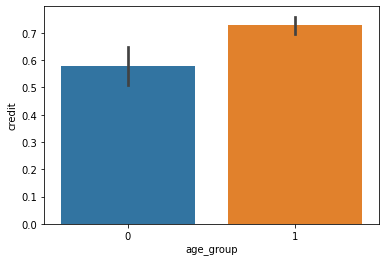

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

df = pd.read_csv('german_credit_data.csv')
df['age_group'] = df['Age'].apply(lambda x: 1 if x > 25 else 0)
df['credit'] = df['Credit repaid'].apply(lambda x: 1 if x == 'yes' else 0)
sns.barplot(x='age_group', y='credit', data=df)

### Random oversampling

In [11]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

favorable = df[df['credit'] == 1]
unfavorable = df[df['credit'] == 0]

favorable_os, _ = ros.fit_resample(favorable, favorable['age_group'])
unfavorable_os, _ = ros.fit_resample(unfavorable, unfavorable['age_group'])

df_os = pd.concat([favorable_os, unfavorable_os])

In [12]:
len(df_os)

1620

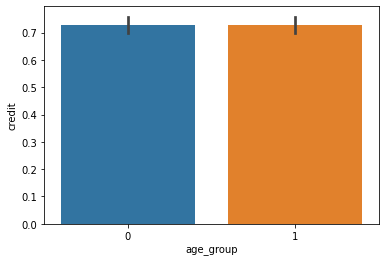

In [13]:
sns.barplot(x='age_group', y='credit', data=df_os)

### Random undersampling

In [14]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

favorable = df[df['credit'] == 1]
unfavorable = df[df['credit'] == 0]

favorable_us, _ = rus.fit_resample(favorable, favorable['age_group'])
unfavorable_us, _ = rus.fit_resample(unfavorable, unfavorable['age_group'])

df_us = pd.concat([favorable_us, unfavorable_us])

In [15]:
len(df_us)

380

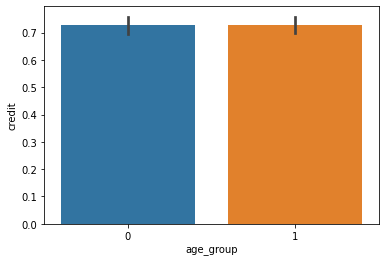

In [16]:
sns.barplot(x='age_group', y='credit', data=df_os)